   Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50

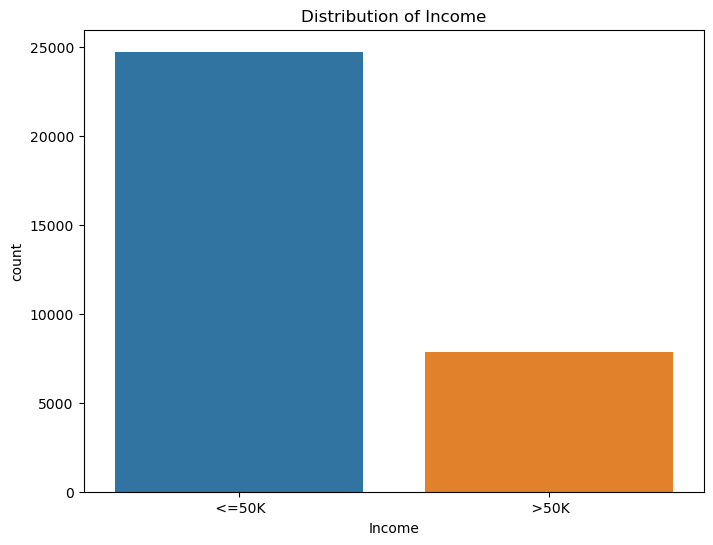

Accuracy: 0.856418918918919
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4912
           1       0.75      0.63      0.68      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.80      6512
weighted avg       0.85      0.86      0.85      6512



In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Data Loading
data_url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Census%20Income/Census%20Income.csv"
census_income = pd.read_csv(data_url)

# Step 2: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(census_income.head())

# Summary statistics of numerical features
print(census_income.describe())

# Check for missing values
print(census_income.isnull().sum())

# Visualize the distribution of the target variable (Income)
plt.figure(figsize=(8, 6))
sns.countplot(x='Income', data=census_income)
plt.title('Distribution of Income')
plt.show()

# Step 3: Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = census_income.select_dtypes(include=['object']).columns
for col in categorical_cols:
    census_income[col] = label_encoder.fit_transform(census_income[col])

# Split the data into features (X) and target variable (y)
X = census_income.drop('Income', axis=1)
y = census_income['Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Building
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))
